### Entrada de dados

In [37]:
import pandas as pd
import numpy as np
import networkx as nx
import pylab

data = pd.read_csv("edges1.csv",names=["Inicio", "Fim", "Peso"], encoding = "ISO-8859-1")
data

,Inicio,Fim,Peso
0,1,2,3
1,1,3,8
2,1,5,-4
3,2,5,7
4,2,4,1
5,3,2,4
6,4,3,-5
7,4,1,2
8,5,4,6


In [38]:
for i in range(len(data["Inicio"])):
    G = nx.Graph()
    G.add_edge(data["Inicio"][i], data["Fim"][i], weight=data["Peso"][i])

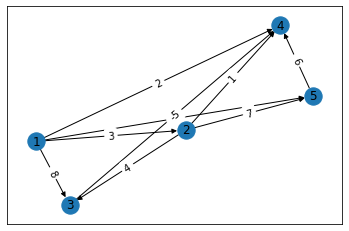

In [39]:

def plot(Grafo):
    G = nx.Graph()
    for i in range(len(Grafo["Inicio"])):
        G.add_edge(Grafo["Inicio"][i], Grafo["Fim"][i], weight=Grafo["Peso"][i])

    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos, arrows=True) #, arrows=True
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    pylab.show()
    return G
retorno = plot(data)

In [86]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

{(1, 2): 3,
 (1, 3): 8,
 (1, 5): -4,
 (2, 5): 7,
 (2, 4): 1,
 (3, 2): 4,
 (4, 3): -5,
 (4, 1): 2,
 (5, 4): 6}

# Algoritmo de Floyd Warshall

In [87]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]

todos_vertices = []
vertices_encontraveis = []

for i in N:
    if i[0] not in todos_vertices:
        todos_vertices.append(i[0])
    if i[1] not in todos_vertices:
        todos_vertices.append(i[1])
    if i[1] not in vertices_encontraveis:
        vertices_encontraveis.append(i[1])
vertices_encontraveis
todos_vertices = sorted(todos_vertices)

In [62]:
for k in todos_vertices:

    vertice_atual = 4
    vertice_inicial = vertice_atual
    vertice_anterior = -1
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]


    for i in range(len(todos_vertices)):
        aux = np.Inf
        for i in N:
            if vertice_atual == i[0]:
                #Menor vertice (proximo)
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])
                
                if N[i] < N[i]:
                    aux = caminhos[i[1]][1]
                    
                    if i[1] not in vertices_descobertos:
                        
                        vertices_descobertos.append(i[1])
                        
                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                    #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                    #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                if N[i] < aux:
                    aux = N[i]
                    proximo_vertice = i[1]
                    
        if proximo_vertice in vertices_passados:
            l3 = [x for x in vertices_descobertos if x not in vertices_passados]
            
            if(len(l3)) == 0:
                break
            else:
                vertice_atual = l3[0]
        else:
            vertice_atual = proximo_vertice
    print("Vertice Inicial: {} -> {}".format(k,caminhos))
    break

Vertice Inicial: 1 -> {1: [4, 2], 2: [3, -1], 3: [4, -5], 4: [4, 0], 5: [2, 6]}


In [78]:
vertice_atual = 4
caminhos = {}
vertices_descobertos = []
vertices_passados = []

for i in todos_vertices:
    if i != vertice_atual:
        caminhos[i] = ["",np.inf]
    else:
        vertices_passados.append(i)
        vertices_descobertos.append(i)
        caminhos[i] = [i,0]

In [103]:
for k in todos_vertices:
    vertice_atual = k
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]


    for i in range(len(todos_vertices)):
        aux = np.Inf
        for i in N:
            if i[0] == vertice_atual:
                
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])

                if i[1] not in vertices_descobertos:         
                    vertices_descobertos.append(i[1])

                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                        #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                        #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                if N[i] < aux:
                    aux = N[i]
                    proximo_vertice = i[1]
        vertice_atual = proximo_vertice
        if proximo_vertice in vertices_passados:
                l3 = [x for x in vertices_descobertos if x not in vertices_passados]
                if(len(l3)) == 0:
                    break
                else:
                    vertice_atual = l3[0]
    

    print("Vertice Inicial: {} -> {}".format(k,caminhos))

Vertice Inicial: 1 -> {1: [1, 0], 2: [3, 1], 3: [4, -3], 4: [5, 2], 5: [1, -4]}
Vertice Inicial: 2 -> {1: [4, 3], 2: [2, 0], 3: [4, -4], 4: [2, 1], 5: [1, -1]}
Vertice Inicial: 3 -> {1: [4, 7], 2: [3, 4], 3: [3, 0], 4: [2, 5], 5: [1, 3]}
Vertice Inicial: 4 -> {1: [4, 2], 2: [3, -1], 3: [4, -5], 4: [4, 0], 5: [1, -2]}
Vertice Inicial: 5 -> {1: [4, 8], 2: [3, 5], 3: [4, 1], 4: [5, 6], 5: [5, 0]}
